In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("Set2", 8)
sns.set_palette(palette)

In [3]:
df = pd.read_table("../compiled_data.tsv", sep="\t")
df.drop(columns=['Unnamed: 10', 'Unnamed: 11'], inplace=True)

In [4]:
df.head()

,ID,organism,contigs,bases,CDS,gene,tRNA,tmRNA,rRNA,repeat_region,known_proteins,hypothetical_proteins
0,M1004846097,Genus species strain,214,1195252,1069,1094,25,NaN,NaN,NaN,1714,475
1,M1008403048,Genus species strain,19,1633169,1479,1525,45,1.0,NaN,NaN,2388,663
2,M1094258468,Genus species strain,17,1780758,1603,1650,45,NaN,2.0,1.0,2594,708
3,M1110726505,Genus species strain,18,1698028,1534,1581,47,NaN,NaN,1.0,2513,651
4,M1211523609,Genus species strain,98,1493477,1329,1366,37,NaN,NaN,1.0,2196,538


In [31]:
print(df["contigs"].mean(), df["contigs"].max(), df["contigs"].min(), df["contigs"].sum())

110.36666666666666 315 10 3311


In [32]:
merged_df.columns

Index(['ID', 'organism', 'contigs', 'bases', 'CDS', 'gene', 'tRNA', 'tmRNA',
       'rRNA', 'repeat_region', 'known_proteins', 'hypothetical_proteins',
       'sampleID', 'sex', 'bmi', 'age', 'smoking_state', 'study_group',
       'Marker Lineage', '# Genomes', '# Markers', '# Marker Sets', '0', '1',
       '2', '3', '4', '5+', 'Completeness', 'Contamination', 'GC', 'GC std',
       'Genome size', '# ambiguous bases', '# scaffolds', '# contigs',
       'Longest scaffold', 'Longest contig', 'N50 (scaffolds)',
       'N50 (contigs)', 'Mean scaffold length', 'Mean contig length',
       'Coding density', 'Translation table', '# predicted genes'],
      dtype='object')

In [36]:
merged_df["N50 (contigs)"].mean()

73238.53333333334

Merge with Metadata

In [5]:
metadata = pd.read_table("../SGB985_metadata.tsv")
checkm = pd.read_csv("../checkm_output/bin_stats_ext.csv")

In [6]:
merged_df = pd.merge(df, metadata, left_on='ID', right_on='magID', how='inner')
merged_df.drop(columns=['magID'], inplace=True)
merged_df = pd.merge(merged_df, checkm, left_on='ID', right_on='ID', how='inner')

In [7]:
merged_df.fillna(0, inplace=True)

<Axes: xlabel='repeat_region', ylabel='Count'>

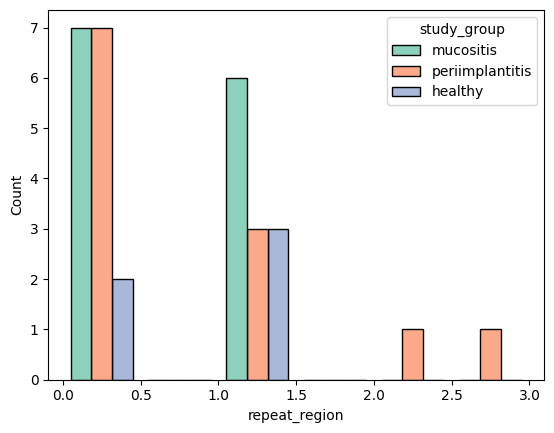

In [8]:
sns.histplot(data=merged_df, x="repeat_region", hue="study_group", multiple="dodge", shrink=.8)

<Axes: xlabel='repeat_region', ylabel='Count'>

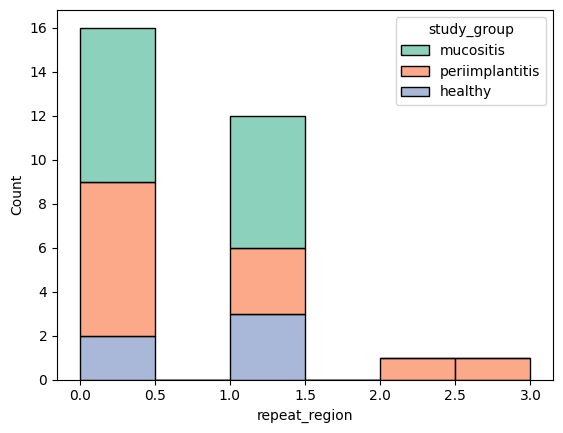

In [9]:
sns.histplot(merged_df, x="repeat_region",hue="study_group", multiple="stack")

<Axes: xlabel='known_proteins', ylabel='Count'>

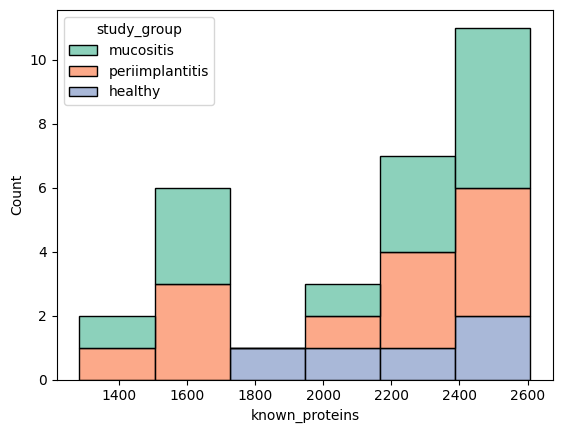

In [10]:
sns.histplot(merged_df, x="known_proteins",hue="study_group", multiple="stack")

<Axes: xlabel='hypothetical_proteins', ylabel='Count'>

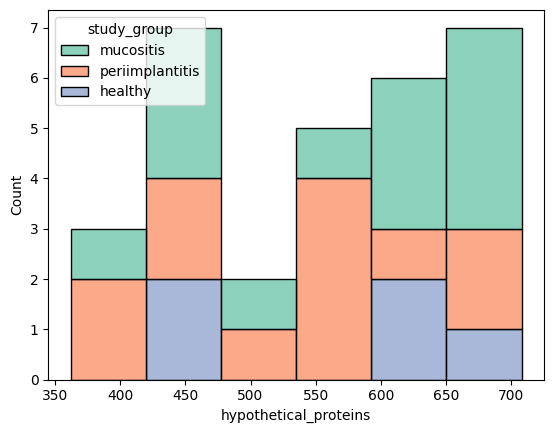

In [11]:
sns.histplot(merged_df, x="hypothetical_proteins",hue="study_group", multiple="stack")

<Axes: xlabel='known_proteins', ylabel='hypothetical_proteins'>

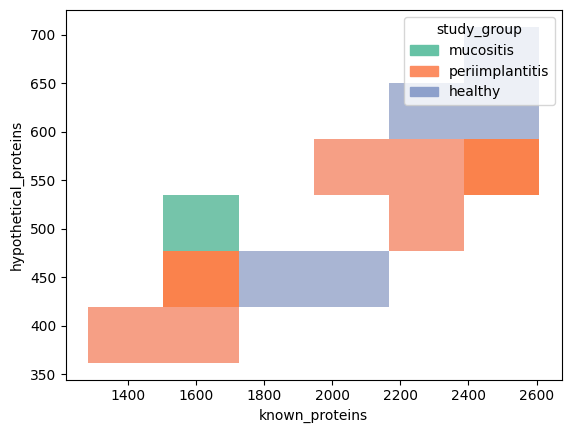

In [12]:
sns.histplot(merged_df, x="known_proteins",y="hypothetical_proteins", hue="study_group")

<Axes: xlabel='tmRNA', ylabel='Completeness'>

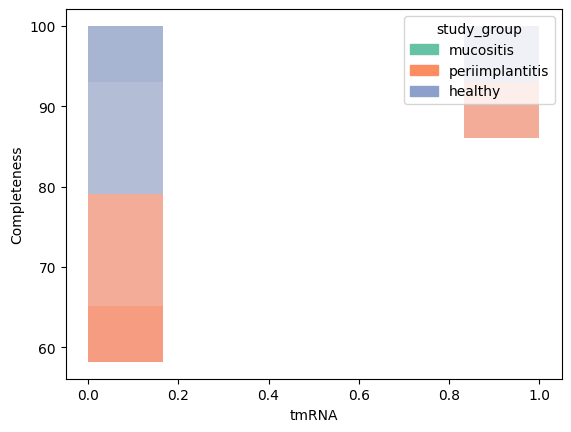

In [25]:
sns.histplot(merged_df, x="tmRNA", y="Completeness", hue="study_group")

In [29]:
merged_df[merged_df["tmRNA"]==1][["tmRNA", "study_group"]]

,tmRNA,study_group
1,1.0,mucositis
12,1.0,periimplantitis
14,1.0,healthy
18,1.0,periimplantitis
26,1.0,periimplantitis


In [11]:
merged_df.columns

Index(['ID', 'organism', 'contigs', 'bases', 'CDS', 'gene', 'tRNA', 'tmRNA',
       'rRNA', 'repeat_region', 'known_proteins', 'hypothetical_proteins',
       'sampleID', 'sex', 'bmi', 'age', 'smoking_state', 'study_group',
       'Marker Lineage', '# Genomes', '# Markers', '# Marker Sets', '0', '1',
       '2', '3', '4', '5+', 'Completeness', 'Contamination', 'GC', 'GC std',
       'Genome size', '# ambiguous bases', '# scaffolds', '# contigs',
       'Longest scaffold', 'Longest contig', 'N50 (scaffolds)',
       'N50 (contigs)', 'Mean scaffold length', 'Mean contig length',
       'Coding density', 'Translation table', '# predicted genes'],
      dtype='object')

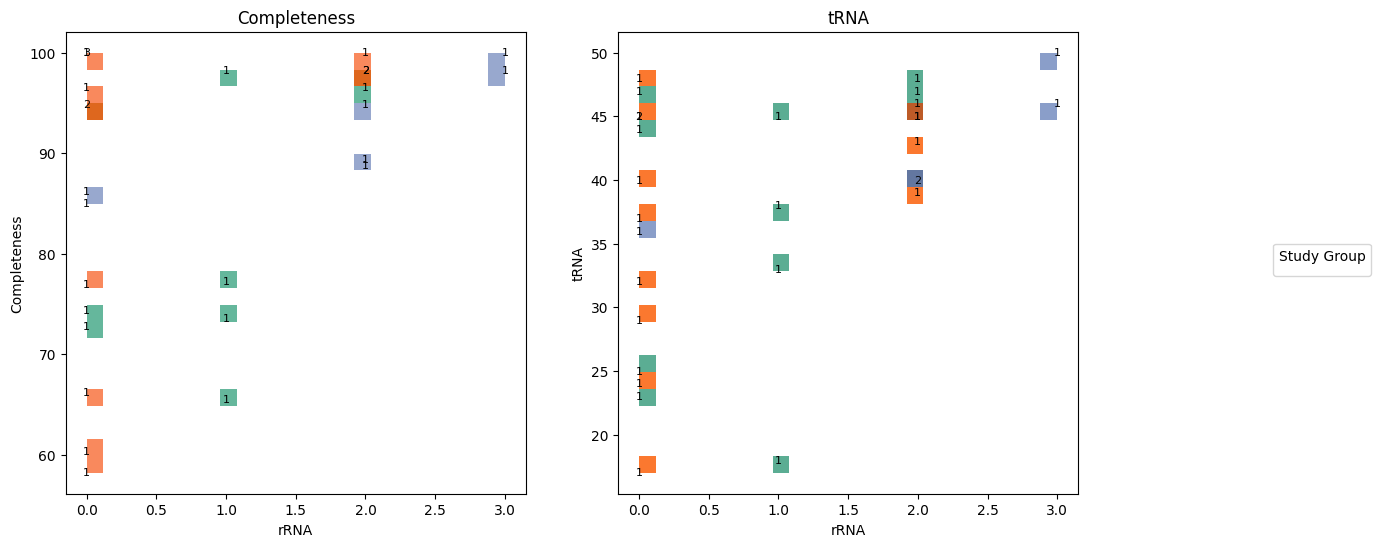

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for "Completeness"
sns_plot1 = sns.histplot(data=merged_df, x="rRNA", y="Completeness", hue="study_group", ax=axes[0], bins=25)
axes[0].set_title('Completeness')

# Plot for "tRNA"
sns_plot2 = sns.histplot(data=merged_df, x="rRNA", y="tRNA", hue="study_group", ax=axes[1], bins=25)
axes[1].set_title('tRNA')

# Remove the legends from the subplots
axes[0].get_legend().remove()
axes[1].get_legend().remove()

# Calculate and add annotations for "Completeness"
counts = merged_df.groupby(["rRNA", "Completeness", "study_group"]).size().reset_index(name="count")
for index, row in counts.iterrows():
    axes[0].annotate(str(row["count"]), (row["rRNA"], row["Completeness"]), 
                     ha='center', va='center', color='black', fontsize=8)

# Calculate and add annotations for "tRNA"
counts = merged_df.groupby(["rRNA", "tRNA", "study_group"]).size().reset_index(name="count")
for index, row in counts.iterrows():
    axes[1].annotate(str(row["count"]), (row["rRNA"], row["tRNA"]), 
                     ha='center', va='center', color='black', fontsize=8)

# Extract the handles and labels from one of the plots
handles, labels = sns_plot1.get_legend_handles_labels()

# Create a single legend with extracted handles and labels
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1, 0.5), title='Study Group')

# Adjust subplot parameters to fit the legend
fig.subplots_adjust(right=0.8)

# Show the plot
plt.show()


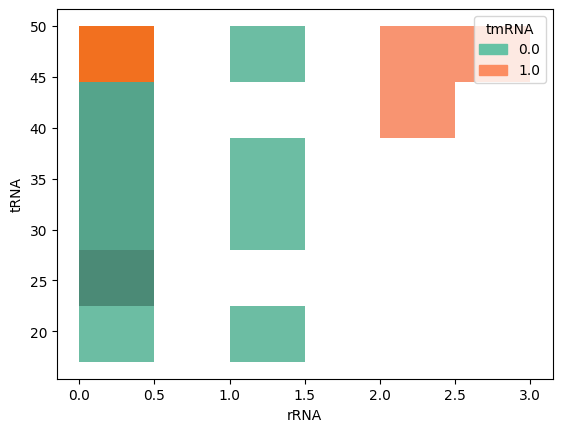

In [47]:
sns.histplot(merged_df, x="rRNA", y="tRNA", hue="tmRNA")
# Calculate counts for each box
counts = merged_df.groupby(["rRNA", "tRNA", "tmRNA"]).size().reset_index(name="count")

# Add counts to each box
for index, row in counts.iterrows():
    plt.annotate(row["count"], (row["rRNA"], row["tmRNA"]), ha='center', va='center', color='black', fontsize=8)

# Show plot
plt.show()

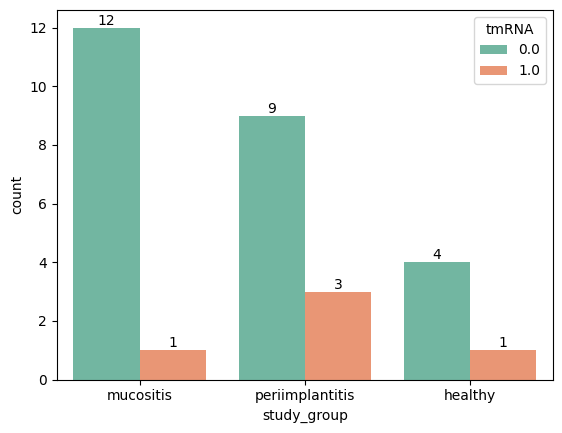

In [101]:
merged_df['tmRNA'] = merged_df['tmRNA'].astype('category')

# Create the count plot
ax = sns.countplot(data=merged_df, x="study_group", hue="tmRNA")

# Add labels for mtRNA occurrences
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Show plot
plt.show()

Given the characteristics of Lancefieldella rimae and the associations observed in the data:

Association with Mucositis (rRNA = 1): Lancefieldella rimae with an rRNA annotation of 1 may indicate high metabolic activity or growth rate of this species. This heightened activity could potentially lead to dysbiosis or imbalance in the oral microbiome, contributing to the development or exacerbation of mucositis. Additionally, Lancefieldella rimae may possess virulence factors or produce metabolites that trigger inflammatory responses associated with mucositis.

Association with Periimplantitis (rRNA = 0 or NA): The absence or non-detection (NA) of rRNA annotations for Lancefieldella rimae in individuals with periimplantitis suggests either low abundance or metabolic dormancy of this species in the context of this condition. This could indicate that Lancefieldella rimae is not actively involved in the pathogenesis of periimplantitis or may have a different metabolic state that is less conducive to disease progression compared to mucositis.

Association with Health (2-3 rRNA): In healthy individuals, the presence of Lancefieldella rimae with 2-3 rRNA annotations may suggest moderate to high metabolic activity of this species. This could contribute to the maintenance of microbial homeostasis and oral health by performing beneficial functions such as metabolizing oral substrates or competing with pathogenic species. The presence of Lancefieldella rimae in healthy individuals' oral microbiomes may indicate its role as a commensal or beneficial member of the microbial community.

In summary, the observed associations between Lancefieldella rimae abundance and rRNA annotations with different health conditions likely reflect variations in its metabolic activity and potential contributions to oral health and disease. Further research into the specific mechanisms underlying these associations could provide valuable insights into the role of Lancefieldella rimae in oral health and disease pathogenesis.

In [103]:
# 1. Correlation analysis
correlation_matrix = merged_df[['bmi', 'age']].corr()

# 2. Breakdown of BMI and Age by Sex within each study group
bmi_by_sex_study_group = merged_df.groupby(['study_group', 'sex'])['bmi'].mean().unstack()
age_by_sex_study_group = merged_df.groupby(['study_group', 'sex'])['age'].mean().unstack()

In [107]:
age_by_sex_study_group

sex,female,male
study_group,,
healthy,58.000000,57.666667
mucositis,65.000000,62.833333
periimplantitis,68.714286,69.800000


In [106]:
bmi_by_sex_study_group

sex,female,male
study_group,,
healthy,23.904891,24.042789
mucositis,22.100764,24.396592
periimplantitis,18.648528,19.261463


In [53]:
merged_df[["Completeness", "Contamination","study_group"]].sort_values(by="Completeness", ascending=False)

,Completeness,Contamination,study_group
28,100.000000,0.000000,periimplantitis
3,100.000000,0.000000,mucositis
5,100.000000,0.000000,mucositis
18,100.000000,0.000000,periimplantitis
1,100.000000,0.000000,mucositis
14,100.000000,3.448276,healthy
15,98.275862,0.000000,mucositis
12,98.275862,1.724138,periimplantitis
21,98.275862,0.000000,mucositis
17,98.275862,0.000000,healthy
